<a href="https://colab.research.google.com/github/Ashuradhipathi/SMS_Classifier/blob/main/sms_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
!pip install tensorflow-datasets
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 533.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 830.9 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 3.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 32.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 33.6 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 26.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# import libraries

import tensorflow as tf
import pandas as pd
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2024-01-04 14:11:13.846926: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 14:11:13.884083: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-04 14:11:13.884121: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-04 14:11:13.885409: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-04 14:11:13.892040: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 14:11:13.892850: I tensorflow/core/platform/cpu_feature_guard.cc:1

2.15.0


In [3]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2024-01-04 14:11:22--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv      100%[===================>] 349.84K  1.60MB/s    in 0.2s    

2024-01-04 14:11:23 (1.60 MB/s) - ‘train-data.tsv’ saved [358233/358233]

--2024-01-04 14:11:23--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv      100%[============

In [4]:
names = ['indicates','text']
train_df = pd.read_csv(train_file_path, sep='\t', names=names)
test_df = pd.read_csv(test_file_path, sep='\t', names=names)

In [5]:
train_df.columns

Index(['indicates', 'text'], dtype='object')

In [6]:
train_df['indicates'] = train_df['indicates'].replace('ham',0)
train_df['indicates'] = train_df['indicates'].replace('spam',1)

In [7]:
test_df['indicates'] = train_df['indicates'].replace('ham',0)
test_df['indicates'] = train_df['indicates'].replace('spam',1)

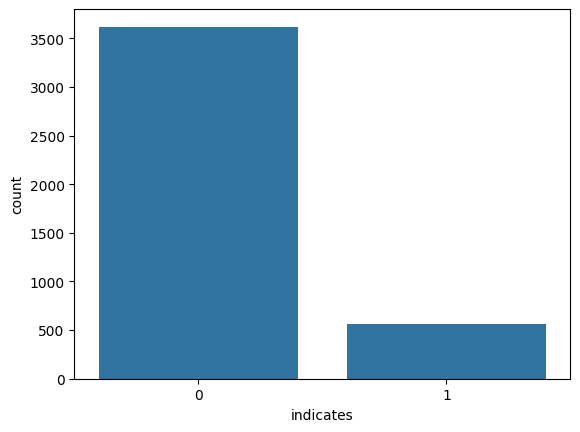

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

sns.countplot(x=train_df['indicates'])
plt.show()


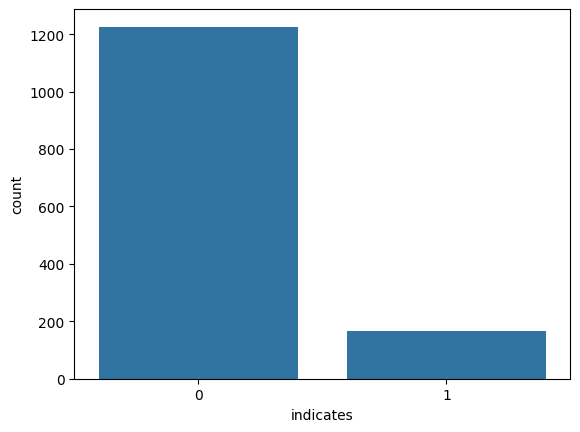

In [9]:
sns.countplot(x=test_df['indicates'])
plt.show()

In [10]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_df['text'], train_df['indicates']))
test_dataset = tf.data.Dataset.from_tensor_slices((test_df['text'], test_df['indicates']))

In [11]:
tokenizer = tfds.deprecated.text.Tokenizer()

vocabulary_set = set()

for text_tensor, _ in train_dataset.concatenate(test_dataset):
  some_tokens = tokenizer.tokenize(text_tensor.numpy())
  vocabulary_set.update(some_tokens)

vocab_size = len(vocabulary_set)
vocab_size

8741

In [12]:
encoder = tfds.deprecated.text.TokenTextEncoder(vocabulary_set)

In [13]:
def encode(text_tensor, label):
  encoded_text = encoder.encode(text_tensor.numpy())
  return encoded_text, label

In [14]:
def encode_map_fn(text, label):
  encoded_text, label = tf.py_function(encode, inp=[text, label], Tout=(tf.int64, tf.int64))

  encoded_text.set_shape([None])
  label.set_shape([])

  return encoded_text, label

In [15]:
train_data_encoded = train_dataset.map(encode_map_fn)
test_data_encoded = test_dataset.map(encode_map_fn)

In [16]:
BUFFER_SIZE = 1000
BATCH_SIZE = 32
train_data = (train_data_encoded.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE))
test_data = (test_data_encoded.padded_batch(BATCH_SIZE))

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 32, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


In [18]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [19]:
history = model.fit(train_data, epochs=10,
                    validation_data=test_data,
                    validation_steps=30)

Epoch 1/10
131/131 [==============================] - 13s 50ms/step - loss: 0.6552 - accuracy: 0.8660 - val_loss: 0.5816 - val_accuracy: 0.8781
Epoch 2/10
131/131 [==============================] - 5s 36ms/step - loss: 0.5057 - accuracy: 0.8660 - val_loss: 0.4322 - val_accuracy: 0.8781
Epoch 3/10
131/131 [==============================] - 5s 36ms/step - loss: 0.3423 - accuracy: 0.8660 - val_loss: 0.4705 - val_accuracy: 0.8781
Epoch 4/10
131/131 [==============================] - 5s 36ms/step - loss: 0.1951 - accuracy: 0.8665 - val_loss: 0.6131 - val_accuracy: 0.8771
Epoch 5/10
131/131 [==============================] - 5s 35ms/step - loss: 0.1162 - accuracy: 0.9555 - val_loss: 0.8164 - val_accuracy: 0.7812
Epoch 6/10
131/131 [==============================] - 5s 35ms/step - loss: 0.0656 - accuracy: 0.9899 - val_loss: 1.1079 - val_accuracy: 0.7708
Epoch 7/10
131/131 [==============================] - 5s 35ms/step - loss: 0.0452 - accuracy: 0.9945 - val_loss: 1.2917 - val_accuracy: 0.772

In [20]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  pred_text = encoder.encode(pred_text)
  pred_text = tf.cast(pred_text, tf.float32)
  prediction = model.predict(tf.expand_dims(pred_text, 0)).tolist()
  if prediction[0][0] < 0.5:
    prediction.append('ham')
  else:
    prediction.append('spam')
  return (prediction)

In [22]:
prediction = predict_message('"how are you doing today"')
print(prediction)

1/1 [==============================] - 0s 13ms/step
[[-4.651196002960205], 'ham']
1/1 [==============================] - 0s 13ms/step
[[-4.651196002960205], 'ham']


In [23]:
prediction = predict_message("you have won £1000 cash! call to claim your prize.")
print(prediction)

1/1 [==============================] - 0s 15ms/step
[[3.104419469833374], 'spam']
1/1 [==============================] - 0s 15ms/step
[[3.104419469833374], 'spam']


In [24]:
prediction = predict_message("i dont want to go. can we try it a different day? available sat")
print(prediction)

1/1 [==============================] - 0s 13ms/step
[[-12.891881942749023], 'ham']
1/1 [==============================] - 0s 13ms/step
[[-12.891881942749023], 'ham']


In [21]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


1/1 [==============================] - 0s 13ms/step
You passed the challenge. Great job!
